# Process Data

In [2]:
pip install loompy 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 18.9 MB/s eta 0:00:0000:0100:01
  Created wheel for loompy: filename=loompy-3.0.8-py3-none-any.whl size=54014 sha256=e7c4dddb496158b104653ac2ba6a954bf5c90d1c03ee708f7b411fe8379dd32f
  Stored in directory: /Users/jiasquared/Library/Caches/pip/wheels/2e/45/28/2c7afc7f9eab47612e1b5090cfb9ba0f00777625064039a6af
Successfully built loompy
Note: you may need to restart the kernel to use updated packages.


In [30]:
from urllib.request import urlretrieve
urlretrieve("http://pklab.med.harvard.edu/velocyto/DentateGyrus/DentateGyrus.loom", "./DentateGyrus.loom")

('./DentateGyrus.loom', <http.client.HTTPMessage at 0x17e929520>)

In [31]:
import loompy
import numpy as np
import pandas as pd

# Open the loom file
loom_file = "DentateGyrus.loom"
ds = loompy.connect(loom_file)

print("Row Attributes (ds.ra):")
for key in ds.ra.keys():
    print(" -", key, "→", ds.ra[key].shape)

print("\nColumn Attributes (ds.ca):")
for key in ds.ca.keys():
    print(" -", key, "→", ds.ca[key].shape)

print("\nLayers:")
for layer in ds.layers.keys():
    print(" -", layer, "→", ds.layers[layer].shape)
    
print(ds.shape)  # (genes, cells)

# Access layers
spliced = ds.layers["spliced"][:]
unspliced = ds.layers["unspliced"][:]

# Access attributes
gene_names = ds.ra["Gene"]
tsne_coords = np.column_stack([ds.ca["TSNE1"], ds.ca["TSNE2"]])
cluster_names = ds.ca["ClusterName"]

RuntimeError: Unable to synchronously check link existence (bad object header version number)

# Visualize Cell Differentiation 

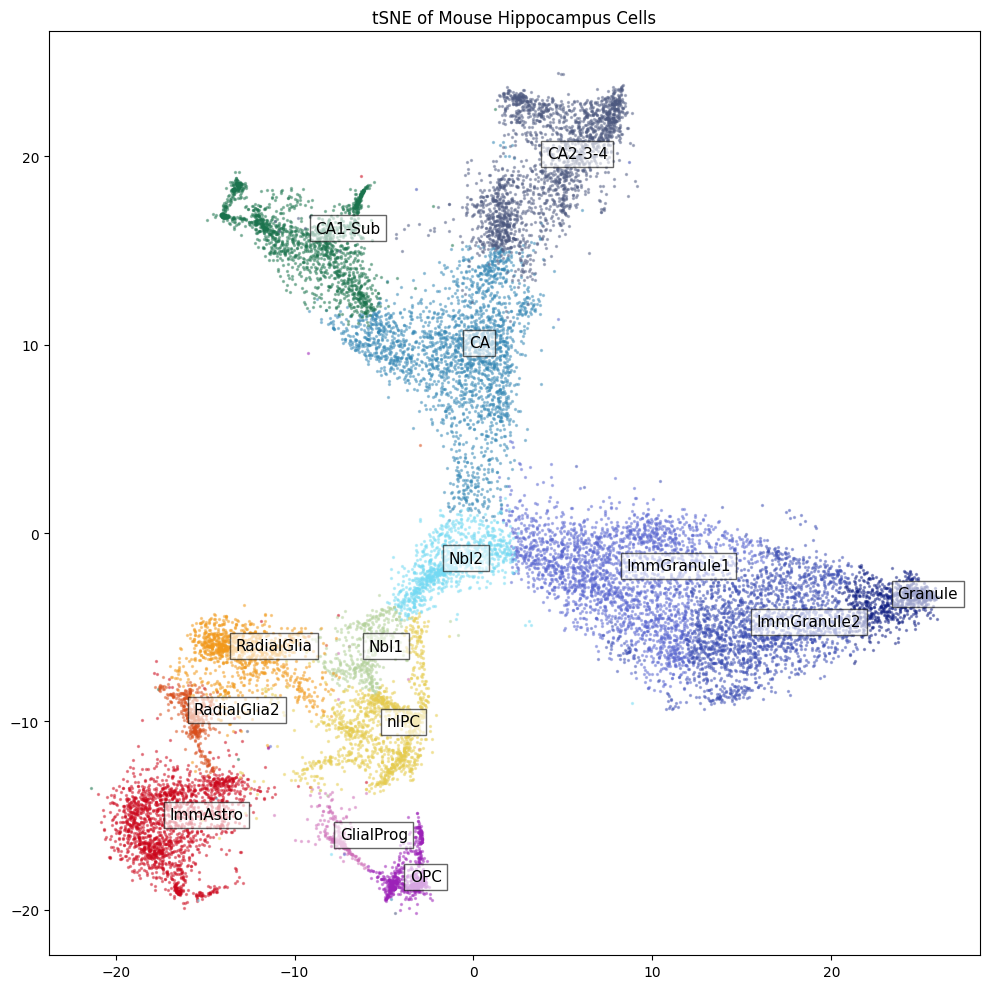

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import loompy

# Create DataFrame
df = pd.DataFrame({
    "ClusterName": cluster_names,
    "TSNE1": tsne_coords[:, 0],
    "TSNE2": tsne_coords[:, 1]
})

# Optional: Assign numeric ClusterIDs if needed
df["ClusterID"] = pd.factorize(df["ClusterName"])[0]

# Define custom cluster color mapping
colors_dict = {
    "RadialGlia": [0.95, 0.6, 0.1], "RadialGlia2": [0.85, 0.3, 0.1],
    "ImmAstro": [0.8, 0.02, 0.1], "GlialProg": [0.81, 0.43, 0.723],
    "OPC": [0.61, 0.13, 0.723], "nIPC": [0.9, 0.8 , 0.3],
    "Nbl1": [0.7, 0.82 , 0.6], "Nbl2": [0.448, 0.855, 0.951],
    "ImmGranule1": [0.35, 0.4, 0.82], "ImmGranule2": [0.23, 0.3, 0.7],
    "Granule": [0.05, 0.11, 0.51], "CA": [0.2, 0.53, 0.71],
    "CA1-Sub": [0.1, 0.45, 0.3], "CA2-3-4": [0.3, 0.35, 0.5]
}

# Plot
plt.figure(figsize=(10, 10))
for name, group in df.groupby("ClusterName"):
    plt.scatter(group["TSNE1"], group["TSNE2"], s=2, label=name,
                color=colors_dict.get(name, "gray"), alpha=0.4)

# Add cluster labels at median positions
for name, group in df.groupby("ClusterName"):
    median_pos = group[["TSNE1", "TSNE2"]].median()
    plt.text(median_pos["TSNE1"], median_pos["TSNE2"], name,
             fontsize=11, bbox={"facecolor": "w", "alpha": 0.6})

plt.title("tSNE of Mouse Hippocampus Cells")
plt.tight_layout()
plt.show()


# Filter Data

In [ ]:
U = np.loadtxt("unspliced.csv", delimiter=",")  # shape: (genes, cells)
S = np.loadtxt("spliced.csv", delimiter=",")

gene_mask = (U.mean(axis=1) > threshold) & (S.mean(axis=1) > threshold)
U = U[gene_mask]
S = S[gene_mask]

# Fit RNA Velocity Model 

In [ ]:
from sklearn.linear_model import LinearRegression

def fit_velocity(u, s):
    model = LinearRegression().fit(u.reshape(-1, 1), s)
    s_pred = model.predict(u.reshape(-1, 1))
    velocity = s - s_pred
    return velocity, model.coef_, model.intercept_

# Apply PCA

In [2]:
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

X = PCA(n_components=30).fit_transform(S.T)  # Cells × features
nn = NearestNeighbors(n_neighbors=30).fit(X)
neighbors = nn.kneighbors(return_distance=False)

pooled_velocity = np.zeros_like(velocity)
for i in range(velocity.shape[1]):
    pooled_velocity[:, i] = velocity[:, neighbors[i]].mean(axis=1)

embedding = umap.UMAP().fit_transform(S.T)
velocity_2d = PCA_projection.T @ pooled_velocity  # Cells × PCs

NameError: name 'S' is not defined

# Visualization w/ Velocity 

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(embedding[:, 0], embedding[:, 1], c="gray", s=10)
plt.quiver(
    embedding[:, 0], embedding[:, 1],
    velocity_2d[0, :], velocity_2d[1, :],
    angles='xy', scale_units='xy', scale=1, color='red'
)
plt.show()
